# BY Longitudinal wavelength vs R plot


### Brown and York Schwarschild coord R

Abstract: The longitidinal wavelength plunges to 0 at R = 2M, Tom wonders if we can get a reflection of an incoming wave with this mechanism?


In [11]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, pi, sqrt
from sympy.utilities.lambdify import lambdify

from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)




0.4.0


In [12]:
from sympy.abc import M, R, A, D


In [13]:
# E_d3 Brown York equation 6.18 divided by area of sphere
# Brown York 6.18 is an equation for Energy changing when dR is changed, but we want energy density...
E_d3 = -1/(4*pi)*(1 - (1 - M/R)/sqrt((1 - 2*M/R)))/R**2
E_d3 = E_d3.expand().simplify()
print(E_d3)

(-M*sqrt((-2*M + R)/R) + 2*M + R*sqrt((-2*M + R)/R) - R)/(4*pi*R**2*(-2*M + R))


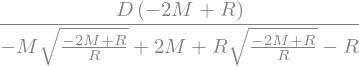

In [14]:
# Lamda wavelength (aka dR in some other work here) is for a wave of mass DeltaM (called D)
l = D/E_d3/(4*pi*R**2)
l

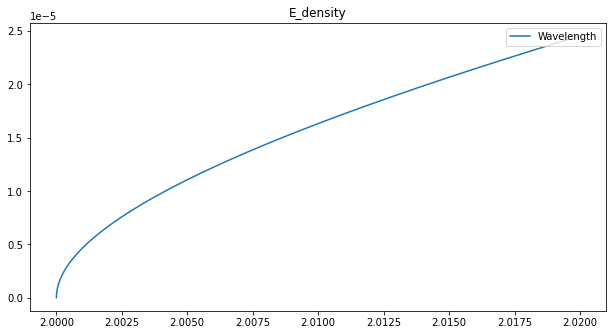

In [15]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
#M = 1
#Make x values - which we will sub in for r 

#D is the DeltaM, so say D = 0.1

x = np.arange(2.00000001, 2.02, 0.000001)
func = lambdify([R,M, D], l, "numpy")
func3 = lambdify([R,M], E_d3, "numpy")
m_val = 1.0
D_val = 0.0001
lVals = func(x, m_val, D_val)
E_d3Vals = func3(x, m_val)
#print(lVals)
#print(E_d3Vals)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,lVals, label="Wavelength")
#ax.plot(x,E_d3Vals, label="Brown_density")

ax.set_title("E_density")

ax.legend(loc="upper right")


# the BY longitudinal wavelength dives toward 0 at R = 2M

## Various Wolfram links

* York Brown Energy - derivative [wolfram ](https://www.wolframalpha.com/input?i=derivative+of+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29).

* (2M - York Brown Energy) - Lynden-Bell pag 24p - constant  [wolfram ](https://www.wolframalpha.com/input?i=simplify+2M+-+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29+%2B+M%5E2%2F%28x+-+M+%2B+%28x%28x+-+2M%29%29%5E%281%2F2%29%29).
    
    So the York Brown Energy and the Lynden Bell one are related it seems. 
    
    One measures energy inside a radius R, the other one outside a radius R, add them together, get a constant - the mass of the black hole.
    
    But if that is the case then why in the image do the energy densities not agree?


### 